In [36]:
import pandas as pd
import numpy as np


In [37]:
train_df = pd.read_csv('train.csv', index_col = 'id')
test_df = pd.read_csv('test.csv', index_col = 'id')
# secondary = pd.read_csv('secondary_data.csv', sep = ';')

In [38]:
# train_df = pd.concat([train_df, secondary], ignore_index=True)

In [39]:
train_df

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
id,,,,,,,,,,,,,,,,,,,,,
0,e,8.80,f,s,u,f,a,c,w,4.51,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,p,4.51,x,h,o,f,a,c,n,4.79,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,e,6.94,f,s,b,f,x,c,w,6.85,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,e,3.88,f,y,g,f,s,NaN,g,4.16,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,e,5.85,x,l,w,f,d,NaN,w,3.37,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116940,e,9.29,f,NaN,n,t,NaN,NaN,w,12.14,...,b,NaN,w,u,w,t,g,NaN,d,u
3116941,e,10.88,s,NaN,w,t,d,c,p,6.65,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
3116942,p,7.82,x,e,e,f,a,NaN,w,9.51,...,NaN,NaN,y,NaN,w,t,z,NaN,d,a


In [40]:
features = train_df.drop('class', axis = 1).columns.tolist()

In [41]:
features_with_high_null_values = [feature for feature in features if (train_df[feature].isna().sum()/len(train_df) * 100) > 20]
features_with_high_null_values

['cap-surface',
 'gill-spacing',
 'stem-root',
 'stem-surface',
 'veil-type',
 'veil-color',
 'spore-print-color']

In [42]:
categorical_features = train_df[features].select_dtypes(include = 'object').columns.tolist()

In [43]:
numerical_features = list(set(features) - set(categorical_features))


In [44]:
def cleaner(df):
    for col in categorical_features:
        df[col] = df[col].fillna('missing')
        df.loc[df[col].value_counts(dropna = False)[df[col]].values < 100, col] = 'noise'
        df[col] = df[col].astype('category')

    return df

In [45]:
train_df = cleaner(train_df)
test_df = cleaner(test_df)

In [46]:
train_df[train_df.isna().any(axis = 1)]

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
id,,,,,,,,,,,,,,,,,,,,,
707400,e,NaN,x,d,n,t,p,missing,r,6.37,...,missing,missing,e,missing,missing,f,f,missing,d,a
1946148,p,NaN,f,missing,w,f,a,c,w,3.17,...,missing,i,w,missing,missing,f,f,missing,p,a
2321206,p,NaN,x,missing,y,t,x,missing,u,7.76,...,s,missing,w,missing,u,f,f,missing,d,a
3041289,p,NaN,s,missing,n,t,d,c,w,8.10,...,missing,missing,e,missing,missing,f,f,missing,d,a


In [47]:
train_df

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
id,,,,,,,,,,,,,,,,,,,,,
0,e,8.80,f,s,u,f,a,c,w,4.51,...,missing,missing,w,missing,missing,f,f,missing,d,a
1,p,4.51,x,h,o,f,a,c,n,4.79,...,missing,y,o,missing,missing,t,z,missing,d,w
2,e,6.94,f,s,b,f,x,c,w,6.85,...,missing,s,n,missing,missing,f,f,missing,l,w
3,e,3.88,f,y,g,f,s,missing,g,4.16,...,missing,missing,w,missing,missing,f,f,missing,d,u
4,e,5.85,x,l,w,f,d,missing,w,3.37,...,missing,missing,w,missing,missing,f,f,missing,g,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116940,e,9.29,f,missing,n,t,missing,missing,w,12.14,...,b,missing,w,u,w,t,g,missing,d,u
3116941,e,10.88,s,missing,w,t,d,c,p,6.65,...,missing,missing,w,missing,missing,f,f,missing,d,u
3116942,p,7.82,x,e,e,f,a,missing,w,9.51,...,missing,missing,y,missing,w,t,z,missing,d,a


In [48]:
cap_diameter_mean = pd.concat([train_df['cap-diameter']]).mean(numeric_only = True)
train_df['cap-diameter'].fillna(cap_diameter_mean, inplace = True)
test_df['cap-diameter'].fillna(cap_diameter_mean, inplace = True)


In [49]:
from sklearn.preprocessing import LabelEncoder

X = train_df.copy()
y = X.pop('class')

lab_enc = LabelEncoder().fit(y)
y = lab_enc.transform(y)

In [50]:
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

from sklearn.model_selection import StratifiedKFold

def model_report(estimator, X, y, cv = 5):
    print('='*80)
    print(f"     Model: {estimator.__class__.__name__}")
    print('='*80)

    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 1/cv, shuffle = True, stratify = y, random_state = 42)

    estimator.fit(X_train, y_train)
    y_pred = estimator.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    print(f"F1 Score : {f1.mean():.6f}")
    print(f"MCC Score : {mcc.mean():.6f}")

    ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()
    plt.title('Confusion Matrix')
    plt.show()

    print()


In [51]:
def model_trainer(model, X, y, n_splits = 5, random_state = 42):
    skfold = StratifiedKFold(n_splits = n_splits, shuffle = True, random_state = random_state)
    oof_probs, oof_mccs = [], []
    print('='*80)
    print(f"Training {model.__class__.__name__}")
    print('='*80, end = '\n')

    for fold, (train_idx, test_idx) in enumerate(skfold.split(X, y)):
        X_train, y_train = X.iloc[train_idx, :], y[train_idx]
        X_test, y_test = X.iloc[test_idx, :], y[test_idx]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        mcc = matthews_corrcoef(y_pred, y_test)
        oof_mccs.append(mcc)
        oof_probs.append(model.predict_proba(test_df))

        print(f"--- Fold {fold + 1} MCC Score: {mcc:.6f}")
        print(f"\n---> Mean MCC Score: {np.mean(oof_mccs):.6f} \xb1 {np.std(oof_mccs):.6f}\n\n")
        return oof_probs, oof_mccs

     Model: XGBClassifier
F1 Score : 0.992358
MCC Score : 0.983147


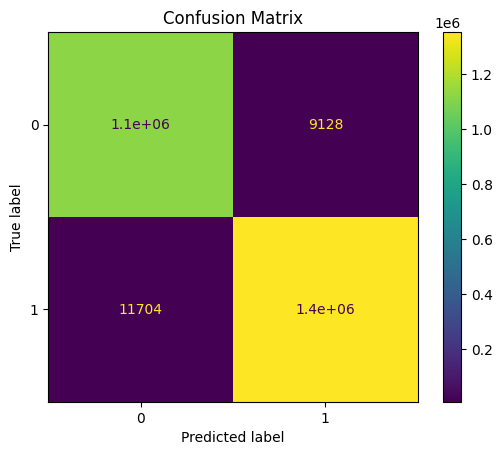

In [52]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(enable_categorical = True, device = 'cuda', tree_method = "hist")

model_report(xgb_clf, X, y)

     Model: CatBoostClassifier
F1 Score : 0.992085
MCC Score : 0.982543


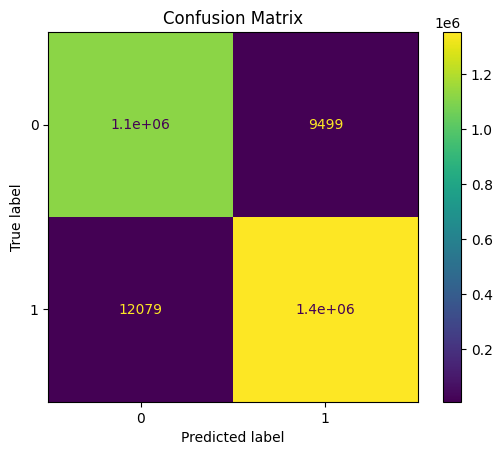

In [53]:
# from catboost import CatBoostClassifier

# cat_clf = CatBoostClassifier(
#     cat_features = categorical_features,
#     verbose = False,
#     allow_writing_files = False,
#     task_type = "GPU"
# )

# model_report(cat_clf, X, y)

     Model: LGBMClassifier
F1 Score : 0.991376
MCC Score : 0.980989


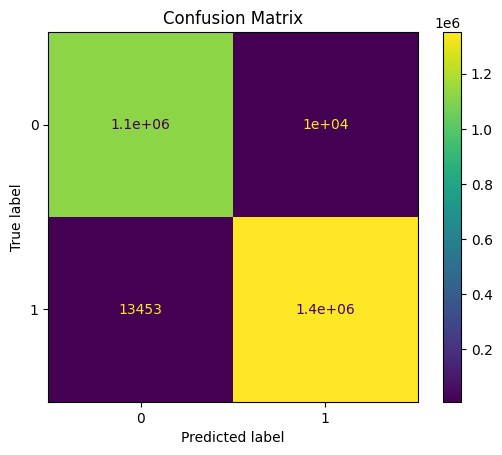

In [54]:
from lightgbm import LGBMClassifier

lgb_clf = LGBMClassifier(device = 'gpu', verbosity = -1)

model_report(lgb_clf, X, y)

In [55]:
xgb_params = {
    'n_estimators': 2407,
    'eta': 0.009462133032592785,
    'gamma': 0.2865859948765318,
    'max_depth': 31,
    'min_child_weight': 47,
    'subsample': 0.6956431754146083,
    'colsample_bytree': 0.3670732604094118,
    'grow_policy': 'lossguide',
    'max_leaves': 73,
    'enable_categorical': True,
    'n_jobs': -1,
    'device': 'cuda',
    'tree_method': 'hist'
} # 0.9844272567086021

cat_params = {
    'iterations': 1041,
    'learning_rate': 0.08777255350163136,
    'depth': 10,
    'l2_leaf_reg': 0.1259643500248322,
    'bootstrap_type': 'Bayesian',
    'random_strength': 4.276181166674371e-08,
    'bagging_temperature': 0.35995482350907326,
    'od_type': 'Iter',
    'od_wait': 39,
    "verbose": False,
    "allow_writing_files": False,
    "task_type": 'GPU',
    "cat_features": categorical_features
} # 0.9841773055825763

lgb_params = {
    'n_estimators': 2500,
    'random_state':42,
    'max_bin':1024,
    'colsample_bytree':0.6,
    'reg_lambda': 80,
    # 'device': 'gpu',
    'verbosity': -1
}

In [56]:
oof_probs = {}

oof_probs['lgb'], _ = model_trainer(LGBMClassifier(**lgb_params), X, y, random_state = 101)

Training LGBMClassifier
--- Fold 1 MCC Score: 0.984746

---> Mean MCC Score: 0.984746 ± 0.000000




In [57]:
oof_preds = {}
for model in oof_probs.keys():
    oof_preds[model] = np.argmax(np.mean(oof_probs[model], axis = 0), axis = 1)

In [58]:
oof_preds['lgb']

array([0, 1, 1, ..., 1, 0, 0], dtype=int64)

In [59]:
preds = oof_preds['lgb']

In [60]:
sub = pd.read_csv('sample_submission.csv')

In [61]:
sub['class'] = lab_enc.inverse_transform(preds)

In [62]:
sub

,id,class
0,3116945,e
1,3116946,p
2,3116947,p
3,3116948,p
4,3116949,e
...,...,...
2077959,5194904,p
2077960,5194905,p
2077961,5194906,p
2077962,5194907,e


In [63]:
sub.to_csv('Example_LGBM.csv', index = False)